In [1]:

import os 
join = os.path.join

In [2]:
params_composite ={
    "r"         :  0.25,
    "h"         :  0.65,
    "z0"        :  2.82/2,
    "density"   : 8,
    "interface_factor"  :  1.2,
    "with_interface"    : False,
    "mirror"            : True,
    "check_jacobian"    : False,
}

params_ccx = {
    "epsilon" : 0.1,
}
params = {
    "mesh" : params_composite,
    "ccx"  : params_ccx,
}

In [3]:

from djccx.read_dat import read_dat

def compute_vol_frac(dat_path):
    dat = read_dat(dat_path)
    vols = [ idat["df"]["volume"].sum() for idat in dat]
    vols_frac = vols[0]/vols[1]
    return vols_frac

In [4]:
import numpy as np

In [5]:
np.linspace(0.2 ,0.3,5)

array([0.2  , 0.225, 0.25 , 0.275, 0.3  ])

In [6]:
r_span = np.linspace(0.15 ,0.25,5)
r_span

array([0.15 , 0.175, 0.2  , 0.225, 0.25 ])

In [7]:
from djccx.frd.readfrd import readfrd

In [8]:
import glob,os
join = os.path.join

In [9]:
frd_files = glob.glob(join("output","r_*","ccx","C","*.frd"),recursive=True)
frd_files

['output\\r_00\\ccx\\C\\main.frd']

In [10]:
dat_files = glob.glob(join("output","r_*","ccx","C","*.dat"),recursive=True)

In [11]:
dat_files

['output\\r_00\\ccx\\C\\main.dat']

In [12]:
ancho = params_composite["z0"] + 0.5*params_composite["h"]
largo = 10 
A = ancho*largo

def compute_Fapl(iffiles):
    ifrd = readfrd(iffiles)
    df = ifrd["data"]
    Fapl = np.sum(df["F2"]*(df["y"] > df["y"].mean()))

    return Fapl

Fapl = [compute_Fapl(f) for f in frd_files]
Sapl = [f/A for f in Fapl]
E_eff = [s / params["ccx"]["epsilon"] for s in Sapl]
E_eff = np.array(E_eff)

In [13]:
vfrac_FEM = [compute_vol_frac(f) for f in dat_files]

In [14]:
vfrac_FEM = np.array(vfrac_FEM)

In [15]:
from matplotlib import pyplot as plt

In [16]:
# *MATERIAL, NAME=MATRIX
# *ELASTIC
# 2549.7289999999994,0.265

# *MATERIAL, NAME=CARBON
# *ELASTIC
# 230000.0,0.3

E_m = 2549.729 
E_c = 230000.0

E_eff_analytical = E_m + (E_c - E_m)*vfrac_FEM

# considramos que la fibras perpendiculares no aportan a la rigidez
E_eff_analytical_2 = E_m + (E_c - E_m)*vfrac_FEM*0.5

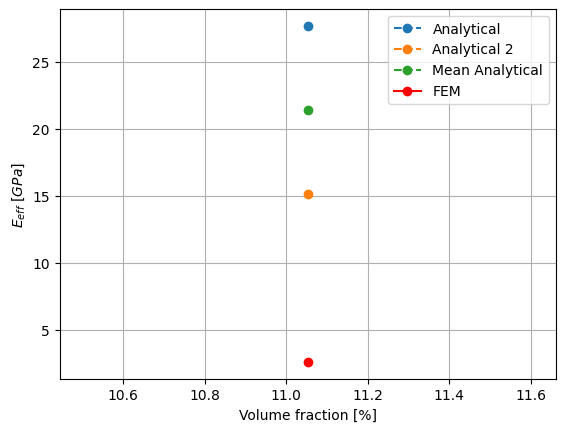

In [17]:
from matplotlib import pyplot as plt
plt.plot(100*vfrac_FEM,1e-3*E_eff_analytical,"o--",label="Analytical")
plt.plot(100*vfrac_FEM,1e-3*E_eff_analytical_2,"o--",label="Analytical 2")
# mean analytical and analytical 2
plt.plot(100*vfrac_FEM,1e-3*0.5*(E_eff_analytical + E_eff_analytical_2),"o--",label="Mean Analytical")
plt.plot(100*vfrac_FEM,1e-3*E_eff,"o-",label="FEM",color="red") 
plt.ylabel(r"$E_{eff} \ [GPa]$")
plt.xlabel("Volume fraction [%]")
plt.legend()
# grid
plt.grid()

In [18]:
import numpy as np
import pandas as pd

In [19]:
import pandas as pd
df_save = pd.DataFrame({"vfrac":vfrac_FEM,"E":E_eff})
df_save.to_csv("E_eff_analytical.csv",index=False)